In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os
import shutil
import numpy as np
import seaborn as sns

In [2]:
labels = [
    "Mean Sea Level Pressure",
    "2m Temperature",
    "2m Dew Point Temperature",
    "Top Net Thermal Radiation",
    "Total Cloud Cover",
    "Total Precipitation",
    "100m Wind Speed",
    "10m Wind Speed",
    "Relative Humidity"
]
units = [
    "hPa",
    "°C",
    "°C",
    "J/m^2",
    "%",
    "mm",
    "m/s",
    "m/s",
    "%"

]
colors =[
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22"
]

months = [
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

In [3]:
filename = '../data/meteoro_LNA/2006_2023.txt'

In [4]:
#Definiendo nombres de la coulumna e  a Função para formatar data e hora


def format_date(row):
    day, month, year = row['date'].split('/')
    year = f"20{year}"  # Adicionando o prefixo "20" ao ano
    hour, minute = row['time'].split(':')
    hour = hour.zfill(2)
    minute = minute.zfill(2)
    return f"{year}/{month}/{day} {hour}:{minute}"

names=['date','time','temp_out','hi_temp','low_temp','out_hum','dew_pt','wind_speed',
       'wind_dir','win_run','hi_speed','wind_chill','heat_index','THW_index','bar','rain',
       'heat_DD','cool_DD','in_temp','in_hum','in_dew','in_heat','arc_int']


# Lendo o arquivo CSV e atribuindo os nomes  das colunas

data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)

data.head()

/tmp/ipykernel_482357/1080827182.py:19: DtypeWarning: Columns (2,3,4,5,6,11,12,13,14,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)


,date,time,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
0,01/09/06,0:05,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
1,01/09/06,0:10,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2,01/09/06,0:15,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
3,01/09/06,0:20,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
4,01/09/06,0:25,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [5]:
# criar a coluna 'datetime'
data['datetime'] = data.apply(lambda row: format_date(row), axis=1)

# Convertendo a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index("datetime", drop=True).sort_index()

# Removendo as colunas originais 'date' e 'time'
data.drop(["date", "time"], inplace=True, axis=1)

data.head()

,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,hi_speed,wind_chill,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-01 00:05:00,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,32.2,14.8,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
2006-09-01 00:10:00,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,32.2,14.9,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2006-09-01 00:15:00,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,32.2,14.6,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:20:00,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,33.8,14.5,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:25:00,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,35.4,14.6,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [6]:
# Convert numerical variables into float
numerical_variables = [
    'temp_out',
    'hi_temp',
    'low_temp',
    'out_hum',
    'dew_pt',
    'wind_speed',
    'win_run',
    'hi_speed',
    'wind_chill',
    'heat_index',
    'THW_index',
    'bar',
    'rain',
    'heat_DD',
    'cool_DD',
    'in_temp',
    'in_hum',
    'in_dew',
    'in_heat',
    'arc_int'
]
for variable in numerical_variables:
    # data[variable] = data[variable].astype(object)
    data[variable] = data[variable].replace('---', None) 
    data[variable] = data[variable].replace('------', None)
    data[variable] = data[variable].replace('', None) 
    data[variable] = data[variable].astype(np.float32)
data = data[['temp_out', 'dew_pt', 'wind_speed', 'rain']]
data.head()

,temp_out,dew_pt,wind_speed,rain
datetime,,,,
2006-09-01 00:05:00,17.900000,11.9,27.400000,0.0
2006-09-01 00:10:00,17.799999,11.8,25.700001,0.0
2006-09-01 00:15:00,17.799999,11.8,29.000000,0.0
2006-09-01 00:20:00,17.799999,11.8,30.600000,0.0
2006-09-01 00:25:00,17.900000,12.0,30.600000,0.0


In [7]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['path.simplify']    = True
plt.rcParams['font.family']  = 'monospace'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 3    
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

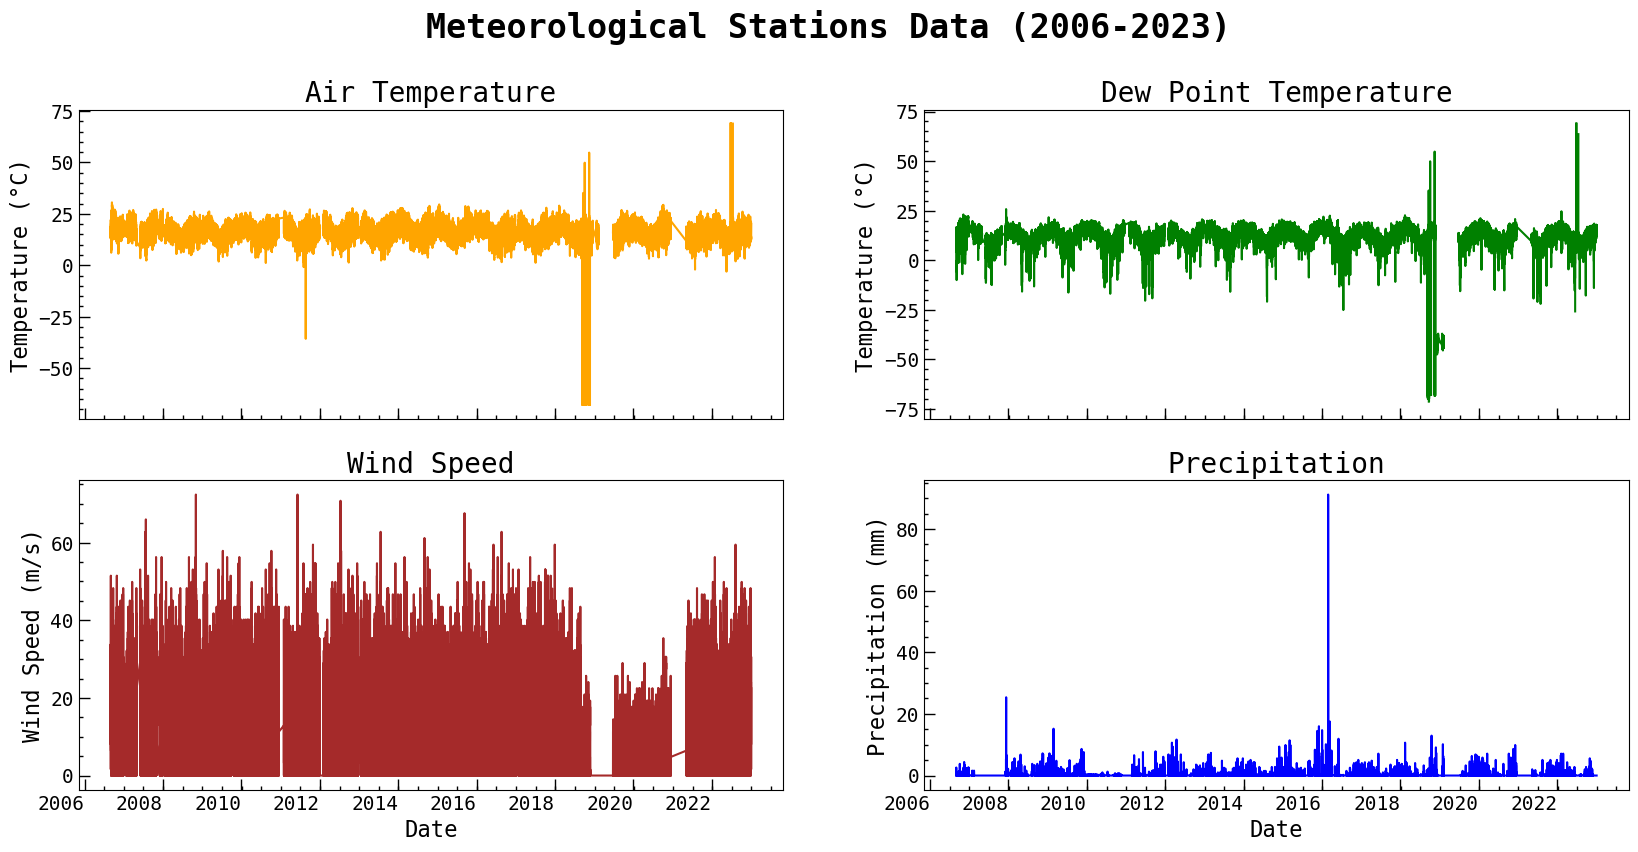

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, facecolor='w')

plt.suptitle("Meteorological Stations Data (2006-2023)", fontsize=24, fontweight='bold')
ax = axs[0][0]
ax.set_title('Air Temperature')
data['temp_out'].plot(ax=ax, color='orange')
# increase font size yticks

ax.set_ylabel('Temperature (°C)')

ax = axs[0][1]
ax.set_title("Dew Point Temperature")
data['dew_pt'].plot(ax=ax, color='green')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Temperature (°C)')

ax = axs[1][0]
ax.set_title("Wind Speed")
data['wind_speed'].plot(ax=ax, color='brown')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Date')

ax = axs[1][1]
ax.set_title("Precipitation")
data['rain'].plot(ax=ax, color='blue')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Date')

plt.savefig("../images/meteorological_variables.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

In [9]:
# resample monthly
data_monthly = data.resample('M').mean()

/tmp/ipykernel_482357/36432903.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


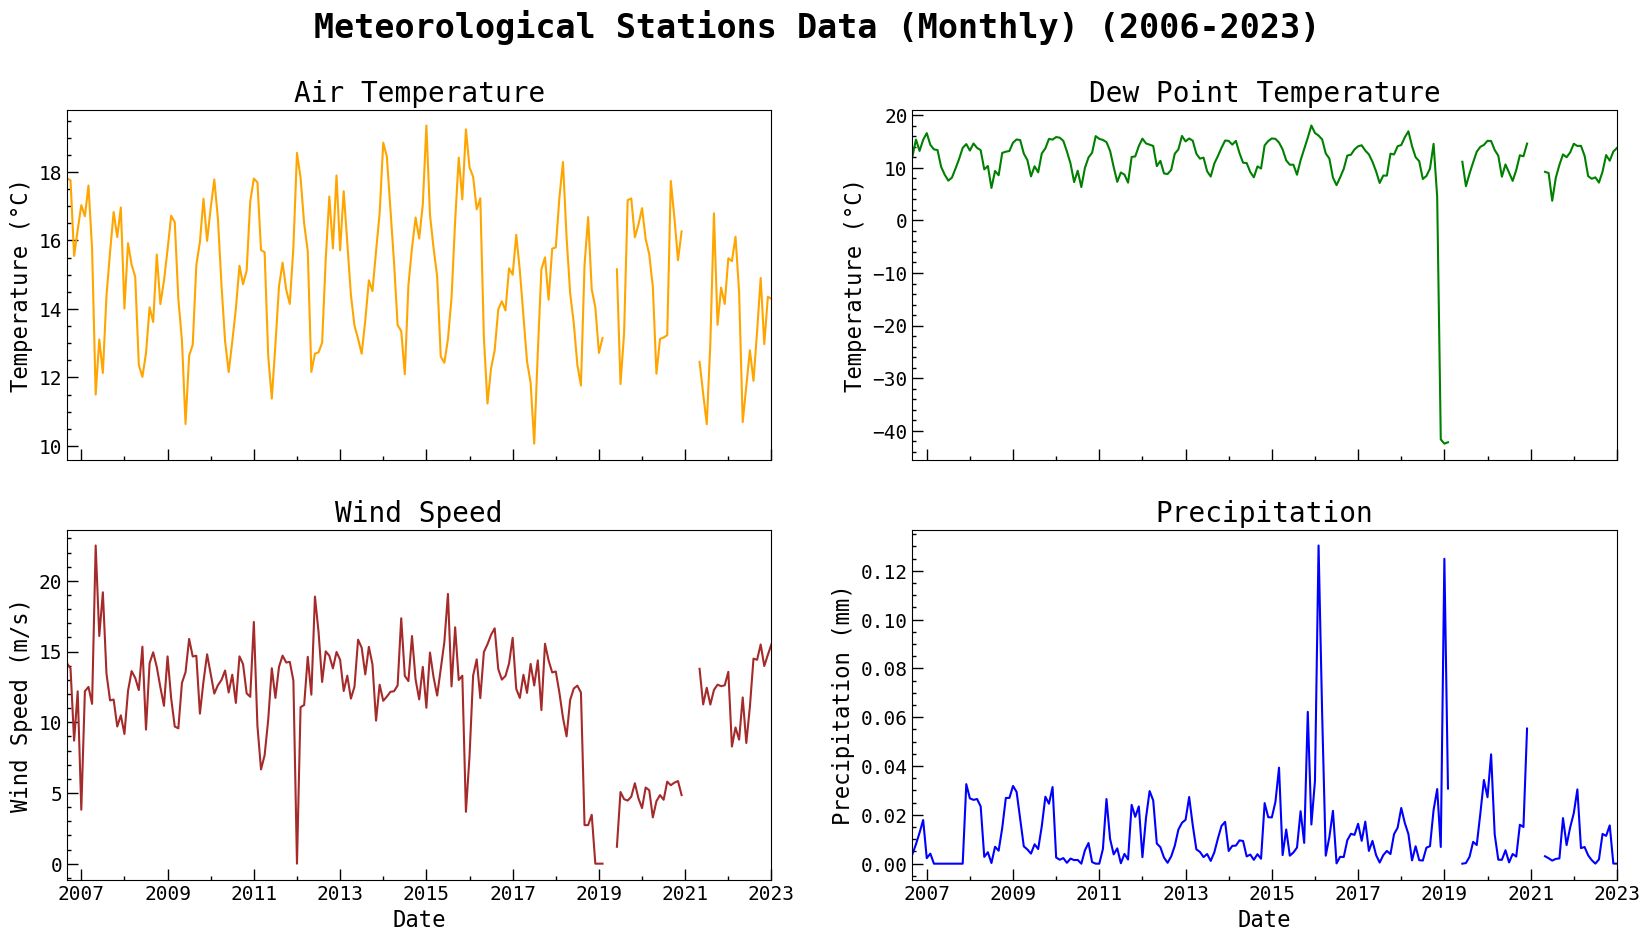

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, facecolor='w')

plt.suptitle("Meteorological Stations Data (Monthly) (2006-2023)", fontsize=24, fontweight='bold')
ax = axs[0][0]
ax.set_title('Air Temperature')
data_monthly['temp_out'].plot(ax=ax, color='orange')
# increase font size yticks

ax.set_ylabel('Temperature (°C)')

ax = axs[0][1]
ax.set_title("Dew Point Temperature")
data_monthly['dew_pt'].plot(ax=ax, color='green')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Temperature (°C)')

ax = axs[1][0]
ax.set_title("Wind Speed")
data_monthly['wind_speed'].plot(ax=ax, color='brown')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Date')

ax = axs[1][1]
ax.set_title("Precipitation")
data_monthly['rain'].plot(ax=ax, color='blue')
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Date')

plt.savefig("../images/monthly_meteorological_variables.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

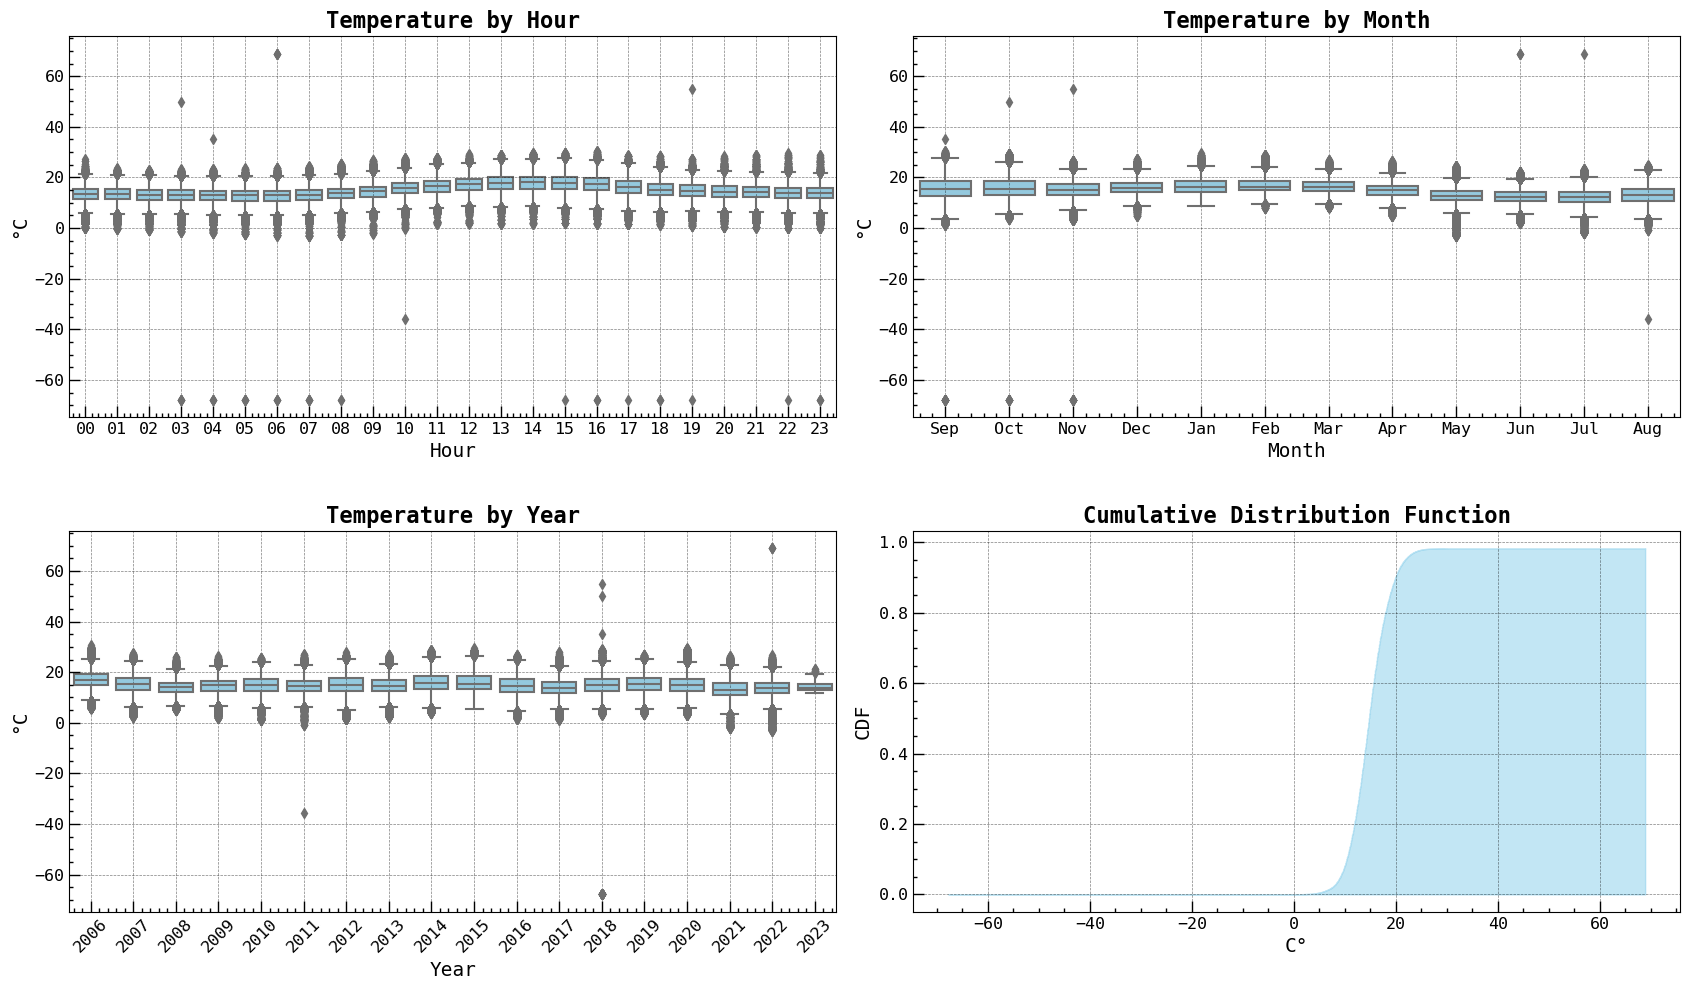

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = data[['temp_out']].copy()
data_var.columns = ['Temperature']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Temperature', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Temperature', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Temperature', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Temperature'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("C°", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../images/weather_station_temperature_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

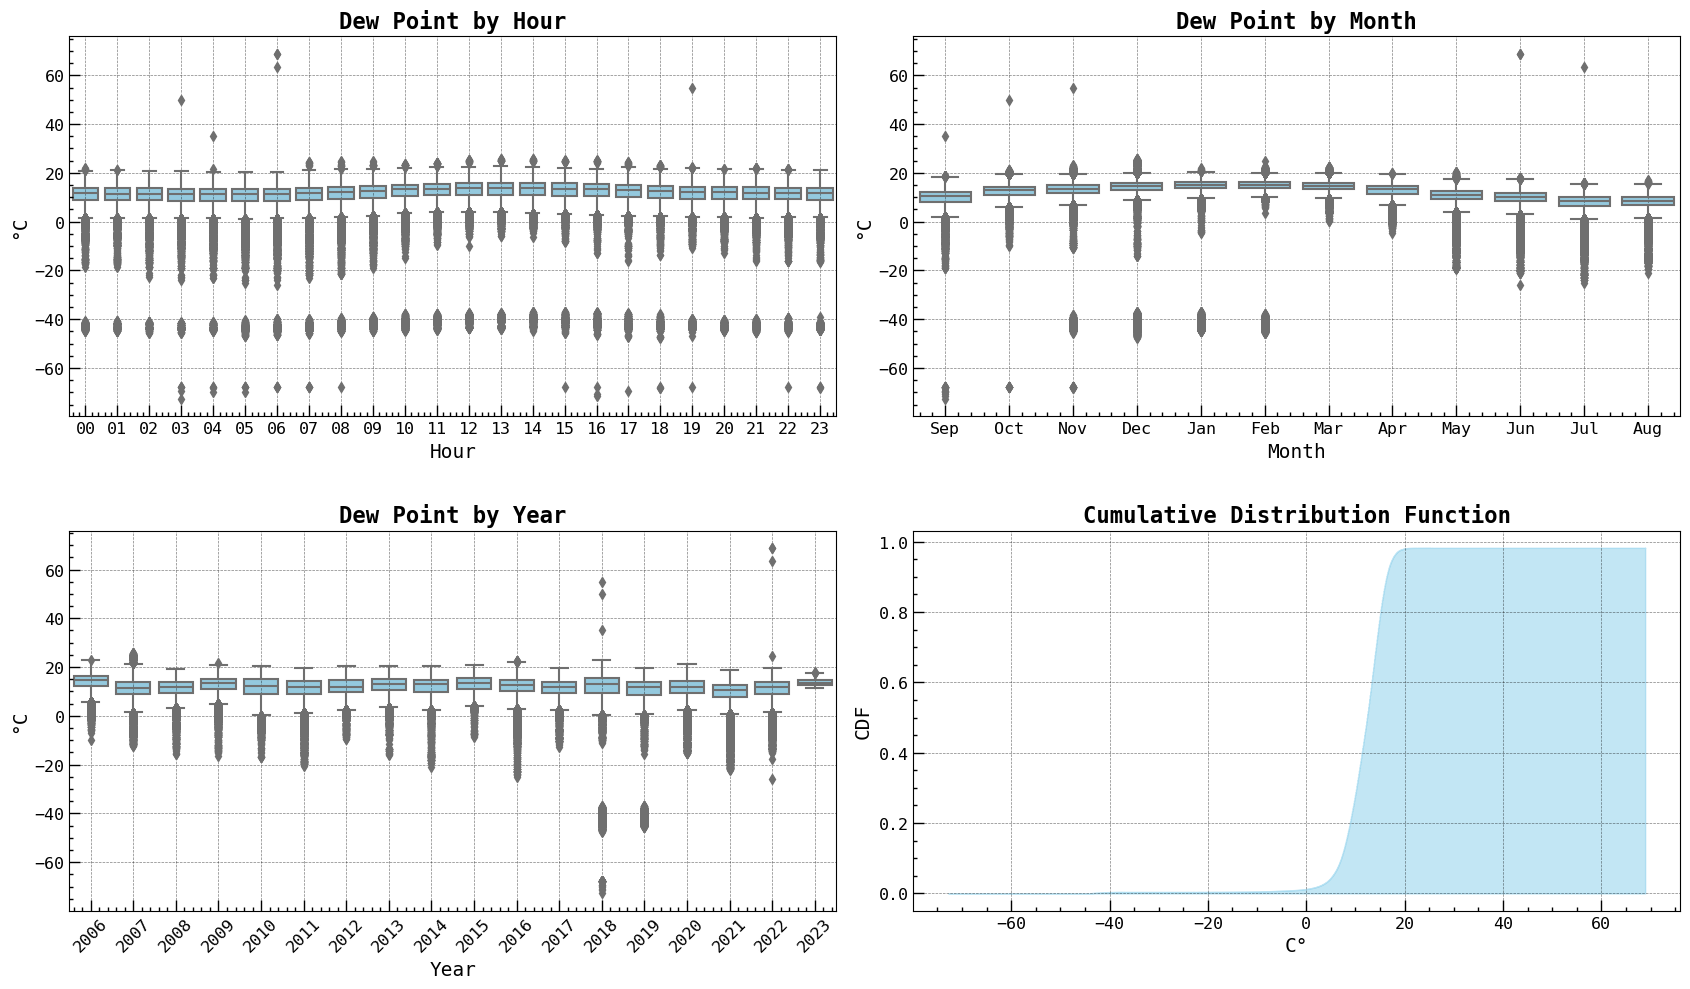

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of Dew Point
data_var = data[['dew_pt']].copy()
data_var.columns = ['Dew Point']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Dew Point', data=data_var, ax=ax, color='skyblue')
ax.set_title("Dew Point by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Dew Point', data=data_var, ax=ax, color='skyblue')
ax.set_title("Dew Point by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Dew Point', data=data_var, ax=ax, color='skyblue')
ax.set_title("Dew Point by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Dew Point'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("C°", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../images/weather_station_dewpoint_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

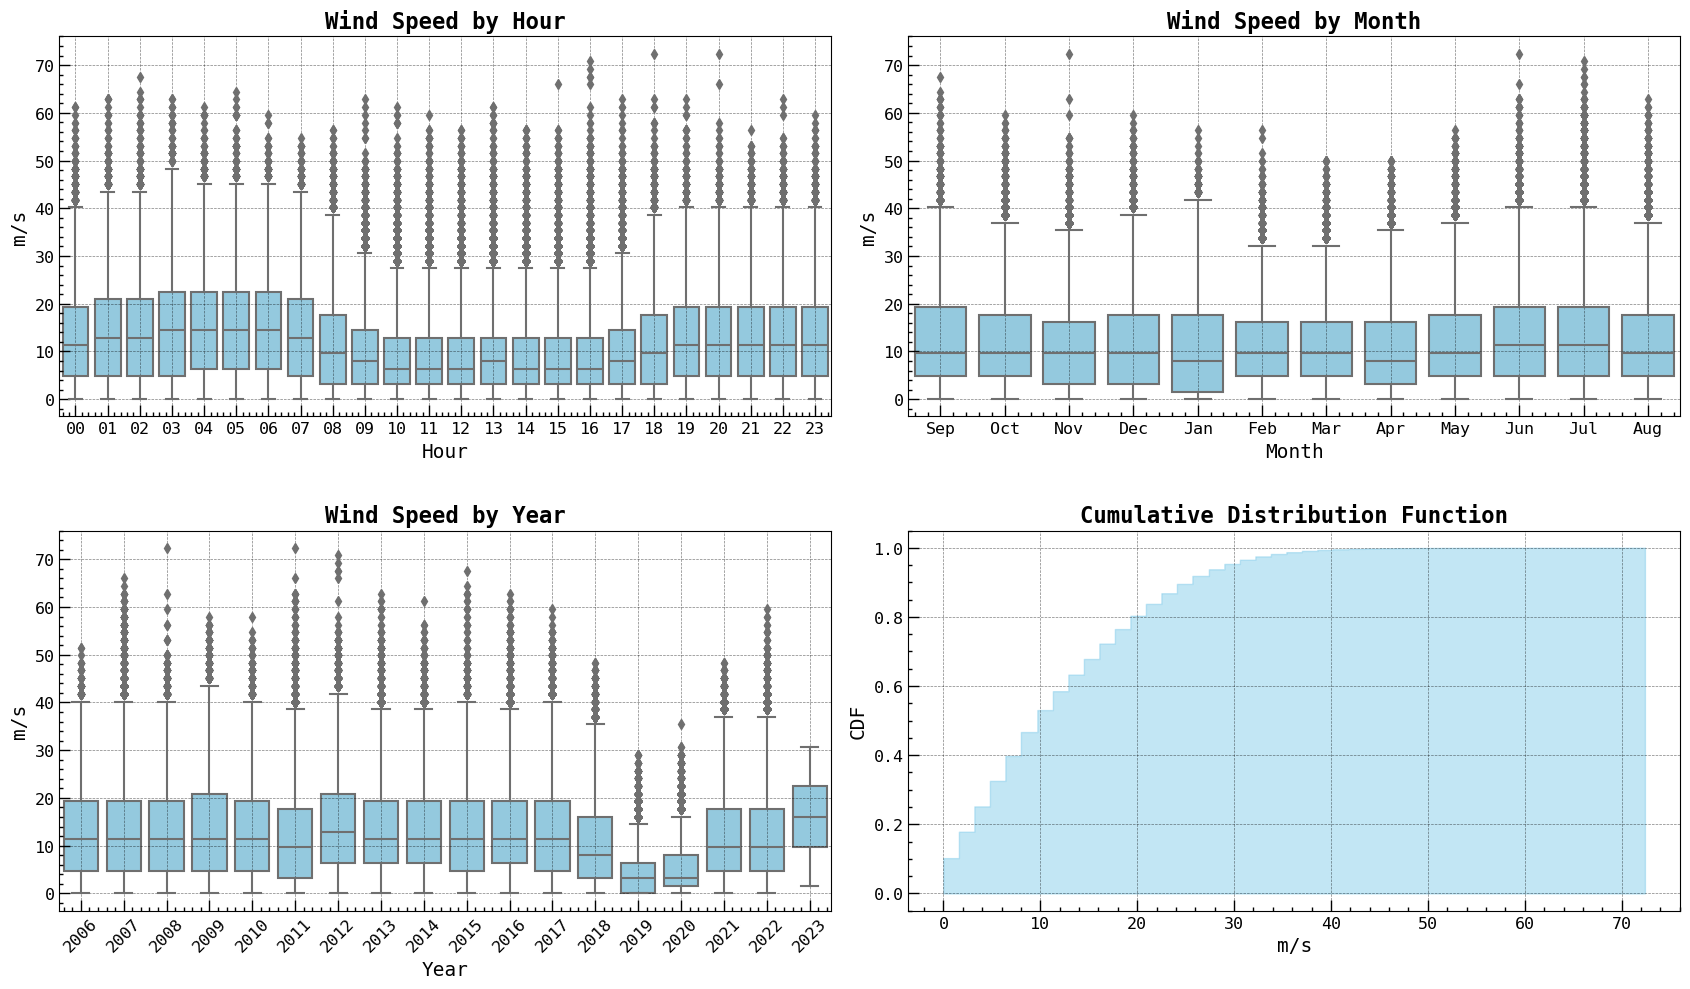

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of Wind Speed
data_var = data[['wind_speed']].copy()
data_var.columns = ['Wind Speed']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Wind Speed', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Wind Speed', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Wind Speed', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Wind Speed'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("m/s", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../images/weather_station_windspeed_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

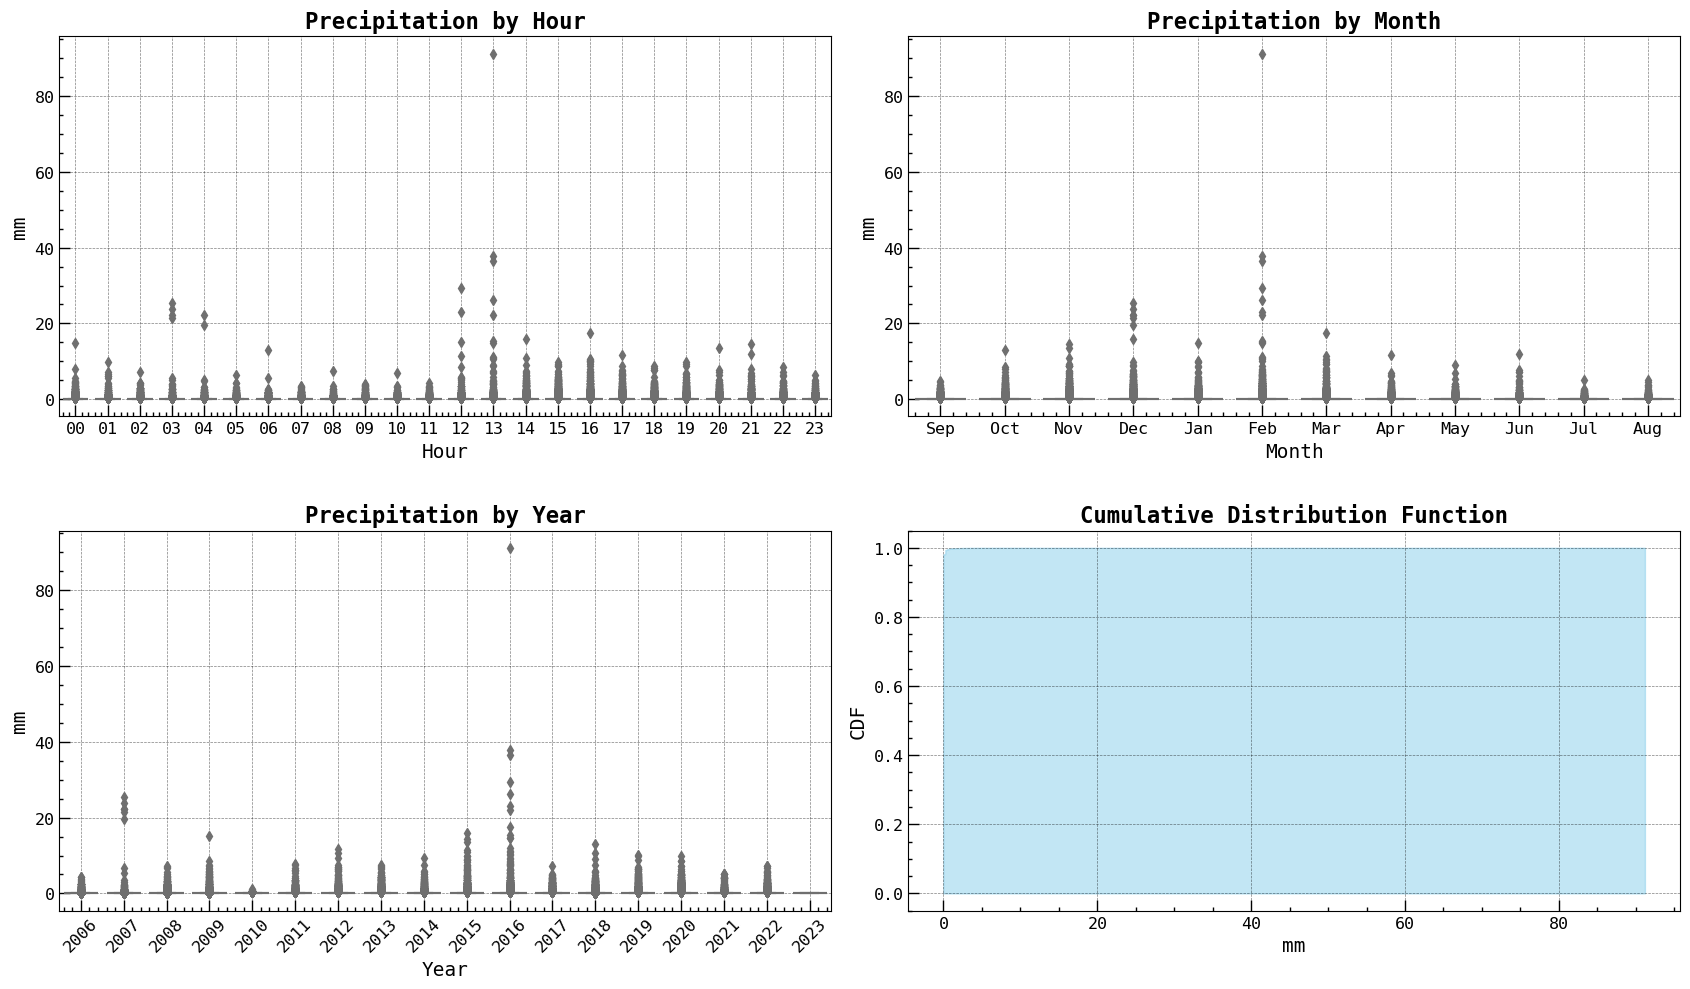

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of Precipitation
data_var = data[['rain']].copy()
data_var.columns = ['Precipitation']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Precipitation', data=data_var, ax=ax, color='skyblue', showfliers=True)
ax.set_title("Precipitation by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Precipitation', data=data_var, ax=ax, color='skyblue', showfliers=True)
ax.set_title("Precipitation by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Precipitation', data=data_var, ax=ax, color='skyblue', showfliers=True)
ax.set_title("Precipitation by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Precipitation'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("mm", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../images/weather_station_precipitation_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)